# Module 2

In [25]:
# Import common libraries - 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.multicomp as mc
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
from statsmodels.graphics.factorplots import interaction_plot
from openpyxl import Workbook
from openpyxl.drawing.image import Image

## Section 11
Common Instructions - 
Perform the following steps.

1. State the hypotheses and identify the claim.
2. Find the critical value.
3. Compute the test value.
4. Make the decision.
5. Summarize the results.

Use the traditional method of hypothesis testing unless otherwise specified. Assume all assumptions are met.

### Part 1
#### 6. Blood Types
A medical researcher wishes to see if hospital patients in a large hospital have the same blood type distribution as those in the general population. The distribution for the general population is as follows: type A, 20%; type B, 28%; type O, 36%; and type AB = 16%. He selects a random sample of 50 patients and finds the following: 12 have type A blood, 8 have type B, 24 have type O, and 6 have type AB blood.

At α = 0.10, can it be concluded that the distribution is the same as that of the general population?

#### 8. On-Time Performance by Airlines
According to the Bureau of Transportation Statistics, on-time performance by the airlines is described as follows:

|Action | % of Time |
|-------|-----------|
|On time | 70.8 |
|National Aviation System delay | 8.2 |
|Aircraft arriving late | 9.0 |
|Other (because of weather and other conditions) |	12.0 |

Records of 200 randomly selected flights for a major airline company showed that 125 planes were on time; 40 were delayed because of weather, 10 because of a National Aviation System delay, and the rest because of arriving late. At α = 0.05, do these results differ from the government’s statistics?

*Source: Transtats: OST_R|BTS*

In [4]:
# Section 11-1
# 6. Blood Types
# Create a DataFrame with observed and expected frequencies
data_11_1_6 = {
   'Blood_Type': ['A', 'B', 'O', 'AB'],
   'Observed': [12, 8, 24, 6],
   'Expected_Prop': [0.20, 0.28, 0.36, 0.16]
}

df_11_1_6 = pd.DataFrame(data_11_1_6)

# Calculate expected frequencies
total_sample_11_1_6 = 50
df_11_1_6['Expected'] = df_11_1_6['Expected_Prop'] * total_sample_11_1_6

# Calculate chi-square components
df_11_1_6['Chi_Square_Component'] = (df_11_1_6['Observed'] - df_11_1_6['Expected'])**2 / df_11_1_6['Expected']

# Calculate chi-square statistic
chi_square_stat_11_1_6 = df_11_1_6['Chi_Square_Component'].sum()

# Calculate degrees of freedom
df_value_11_1_6 = len(df_11_1_6) - 1

# Calculate critical value at α = 0.10
critical_value_11_1_6 = stats.chi2.ppf(0.90, df_value_11_1_6)

# Calculate p-value
p_value_11_1_6 = 1 - stats.chi2.cdf(chi_square_stat_11_1_6, df_value_11_1_6)

# Create results table
results_data_11_1_6 = {
   'Measure': ['Chi-Square Statistic', 'Degrees of Freedom', 'Critical Value (α = 0.10)', 'P-value'],
   'Value': [f"{chi_square_stat_11_1_6:.4f}", str(df_value_11_1_6), f"{critical_value_11_1_6:.4f}", f"{p_value_11_1_6:.4f}"]
}

results_df_11_1_6 = pd.DataFrame(results_data_11_1_6)

# Format the DataFrames for export
df_formatted_11_1_6 = df_11_1_6.round(4)
df_formatted_11_1_6.columns = ['Blood Type', 'Observed', 'Expected Proportion', 'Expected', 'Chi-Square Component']

# Export to Excel with multiple sheets
with pd.ExcelWriter('section_11_1_6.xlsx') as writer:
   df_formatted_11_1_6.to_excel(writer, sheet_name='Calculations', index=False)
   results_df_11_1_6.to_excel(writer, sheet_name='Results', index=False)
   
   # Add conclusion to a separate sheet
   conclusion_11_1_6 = pd.DataFrame({
       'Conclusion': [f"Since the chi-square statistic ({chi_square_stat_11_1_6:.4f}) is {'greater' if chi_square_stat_11_1_6 > critical_value_11_1_6 else 'less'} than the critical value ({critical_value_11_1_6:.4f}), we {'can' if chi_square_stat_11_1_6 > critical_value_11_1_6 else 'cannot'} reject the null hypothesis at α = 0.10."]
   })
   conclusion_11_1_6.to_excel(writer, sheet_name='Conclusion', index=False)

In [5]:
# Section 11-1
# 8. On-Time Performance by Airlines
# Create DataFrames for both expected and observed data
data_11_1_8 = {
   'Category': ['On time', 'National Aviation System delay', 'Aircraft arriving late', 'Other'],
   'Expected_Prop': [0.708, 0.082, 0.090, 0.120],
   'Observed': [125, 10, 25, 40]  # 25 is calculated from 200 - 125 - 10 - 40
}

df_11_1_8 = pd.DataFrame(data_11_1_8)

# Calculate expected frequencies
total_sample_11_1_8 = 200
df_11_1_8['Expected'] = df_11_1_8['Expected_Prop'] * total_sample_11_1_8

# Calculate chi-square components
df_11_1_8['Chi_Square_Component'] = (df_11_1_8['Observed'] - df_11_1_8['Expected'])**2 / df_11_1_8['Expected']

# Calculate chi-square statistic
chi_square_stat_11_1_8 = df_11_1_8['Chi_Square_Component'].sum()

# Calculate degrees of freedom
df_value_11_1_8 = len(df_11_1_8) - 1

# Calculate critical value at α = 0.05
critical_value_11_1_8 = stats.chi2.ppf(0.95, df_value_11_1_8)

# Calculate p-value
p_value_11_1_8 = 1 - stats.chi2.cdf(chi_square_stat_11_1_8, df_value_11_1_8)

# Create results table
results_data_11_1_8 = {
   'Measure': ['Chi-Square Statistic', 
               'Degrees of Freedom', 
               'Critical Value (α = 0.05)', 
               'P-value'],
   'Value': [f"{chi_square_stat_11_1_8:.4f}", 
             str(df_value_11_1_8), 
             f"{critical_value_11_1_8:.4f}", 
             f"{p_value_11_1_8:.4f}"]
}

results_df = pd.DataFrame(results_data_11_1_8)

# Format the main DataFrame for export
df_formatted_11_1_8 = df_11_1_8.round(4)
df_formatted_11_1_8.columns = ['Category', 
                      'Expected Proportion', 
                      'Observed Frequency',
                      'Expected Frequency', 
                      'Chi-Square Component']

# Create conclusion
conclusion_11_1_8 = pd.DataFrame({
   'Conclusion': [
       f"Chi-Square Test Results:",
       f"The chi-square statistic is {chi_square_stat_11_1_8:.4f}",
       f"The critical value at α = 0.05 is {critical_value_11_1_8:.4f}",
       f"The p-value is {p_value_11_1_8:.4f}",
       "",
       "Interpretation:",
       f"Since the chi-square statistic ({chi_square_stat_11_1_8:.4f}) is {'greater' if chi_square_stat_11_1_8 > critical_value_11_1_8 else 'less'} than",
       f"the critical value ({critical_value_11_1_8:.4f}), we {'can' if chi_square_stat_11_1_8 > critical_value_11_1_8 else 'cannot'} reject the null hypothesis",
       "at α = 0.05.",
       "",
       "This means that there {'is' if chi_square_stat > critical_value else 'is not'} sufficient evidence to conclude that",
       "these results differ significantly from the government's statistics."
   ]
})

# Export to Excel with multiple sheets
with pd.ExcelWriter('section_11_1_8.xlsx') as writer:
   df_formatted_11_1_8.to_excel(writer, 
                        sheet_name='Calculations', 
                        index=False)
   results_df.to_excel(writer, 
                      sheet_name='Results', 
                      index=False)
   conclusion_11_1_8.to_excel(writer, 
                      sheet_name='Conclusion', 
                      index=False, 
                      header=False)


### Part 2
#### 8. Ethnicity and Movie Admissions
Are movie admissions related to ethnicity? A 2014 study indicated the following numbers of admissions (in thousands) for two different years. At the 0.05 level of significance, can it be concluded that movie attendance by year was dependent upon ethnicity?

| | Caucasian	| Hispanic	| African American	| Other |
|-|----------|-----------|-------------------|-------|
| 2013	| 724	| 335	| 174	| 107 |
| 2014	| 370	| 292	| 152	| 140 |

*Source: MPAA Study*

#### 10. Women in the Military
This table lists the numbers of officers and enlisted personnel for women in the military. At α = 0.05, is there sufficient evidence to conclude that a relationship exists between rank and branch of the Armed Forces?

| Action	| Officers	| Enlisted |
|-----------|-----------|----------|
| Army	| 10,791	| 62,491 |
| Navy	| 7,816	| 42,750 |
| Marine Corps	| 932	| 9,525 |
| Air Force	| 11,819	| 54,344 |

*Source: New York Times Almanac*

In [ ]:
# Section 11-2
# 8. Ethnicity and Movie Admissions
# Create the contingency table
data_11_2_8 = {
    'Caucasian': [724, 370],
    'Hispanic': [335, 292],
    'African American': [174, 152],
    'Other': [107, 140]
}

# Convert to DataFrame
df_11_2_8 = pd.DataFrame(data_11_2_8, index=['2013', '2014'])

# Perform chi-square test
chi2_stat_11_2_8, p_value_11_2_8, dof_11_2_8, expected_11_2_8 = stats.chi2_contingency(df_11_2_8)

# Calculate row and column totals
row_totals_11_2_8 = df_11_2_8.sum(axis=1)
col_totals_11_2_8 = df_11_2_8.sum(axis=0)
grand_total_11_2_8 = df_11_2_8.values.sum()

# Calculate expected frequencies
expected_freq_11_2_8 = pd.DataFrame(
    expected_11_2_8,
    index=['2013', '2014'],
    columns=['Caucasian', 'Hispanic', 'African American', 'Other']
)

# Export to Excel with multiple sheets
with pd.ExcelWriter("section_11_2_8.xlsx") as writer:

    # Write observed frequencies to the first worksheet
    df_11_2_8.to_excel(writer, sheet_name='Observed Frequencies')

    # Write expected frequencies to the second worksheet
    expected_freq_11_2_8.to_excel(writer, sheet_name='Expected Frequencies')

    # Create summary statistics DataFrame
    summary_stats_11_2_8 = pd.DataFrame({
        'Statistic': ['Chi-square value', 'p-value', 'Degrees of freedom'],
        'Value': [chi2_stat_11_2_8, p_value_11_2_8, dof_11_2_8]
    })

    # Write summary statistics to the third worksheet
    summary_stats_11_2_8.to_excel(writer, sheet_name='Test Statistics', index=False)

    # Add interpretation
    interpretation_11_2_8 = pd.DataFrame({
        'Analysis': ['Interpretation'],
        'Result': [f'At the 0.05 significance level, {"we reject the null hypothesis and conclude that movie attendance is dependent on ethnicity" if p_value_11_2_8 < 0.05 else "we fail to reject the null hypothesis and cannot conclude that movie attendance is dependent on ethnicity"}. (p-value = {p_value_11_2_8:.4f})']
    })

    interpretation_11_2_8.to_excel(writer, sheet_name='Test Statistics', startrow=5, index=False)

In [ ]:
# Section 11-2
# 10. Women in the Military
# Create the contingency table
data = {
    'Officers': [10791, 7816, 932, 11819],
    'Enlisted': [62491, 42750, 9525, 54344]
}
index = ['Army', 'Navy', 'Marine Corps', 'Air Force']

# Convert to DataFrame
df = pd.DataFrame(data, index=index)

# Perform chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(df)

# Calculate row and column totals
row_totals = df.sum(axis=1)
col_totals = df.sum(axis=0)
grand_total = df.values.sum()

# Calculate percentages
percentages = df.copy()
for column in df.columns:
    percentages[f'{column}_Percentage'] = (df[column] / col_totals[column] * 100).round(2)

# Calculate expected frequencies
expected_freq = pd.DataFrame(
    expected,
    index=index,
    columns=['Officers', 'Enlisted']
)

# Export to Excel with multiple sheets
with pd.ExcelWriter("section_11_2_10.xlsx") as writer:

    # Write observed frequencies to the first worksheet
    df.to_excel(writer, sheet_name='Observed Frequencies')

    # Write expected frequencies to the second worksheet
    expected_freq.to_excel(writer, sheet_name='Expected Frequencies')

    # Write percentages to the third worksheet
    percentages.to_excel(writer, sheet_name='Percentages')

    # Calculate chi-square contributions
    chi_square_contributions = (df - expected_freq)**2 / expected_freq
    chi_square_contributions.to_excel(writer, sheet_name='Chi-square Contributions')

    # Create summary statistics DataFrame
    summary_stats = pd.DataFrame({
        'Statistic': ['Chi-square value', 'p-value', 'Degrees of freedom'],
        'Value': [chi2_stat, p_value, dof]
    })

    # Write summary statistics to the fifth worksheet
    summary_stats.to_excel(writer, sheet_name='Test Statistics', index=False)

    # Add interpretation
    interpretation = pd.DataFrame({
        'Analysis': ['Interpretation'],
        'Result': [f'At the 0.05 significance level, {"we reject the null hypothesis and conclude that there is a significant relationship between rank and branch of the Armed Forces" if p_value < 0.05 else "we fail to reject the null hypothesis and cannot conclude that there is a relationship between rank and branch of the Armed Forces"}. (p-value = {p_value:.4f})']
    })

    interpretation.to_excel(writer, sheet_name='Test Statistics', startrow=5, index=False)

    # Add proportions analysis
    officer_proportions = (df['Officers'] / row_totals * 100).round(2)
    enlisted_proportions = (df['Enlisted'] / row_totals * 100).round(2)

    proportions_df = pd.DataFrame({
        'Officer_Percentage': officer_proportions,
        'Enlisted_Percentage': enlisted_proportions
    })
    proportions_df.to_excel(writer, sheet_name='Branch Proportions')

## Section 12

### Part 1

Assume that all variables are normally distributed, that the samples are independent, that the population variances are equal, and that the samples are simple random samples, one from each of the populations. Also, for each exercise, perform the following steps:
1. State the hypotheses and identify the claim.
2. Find the critical value.
3. Compute the test value.
4. Make the decision.
5. Summarize the results.
Use the traditional method of hypothesis testing unless otherwise specified.

#### 8. Sodium Contents of Foods
The amount of sodium (in milligrams) in one serving for a random sample of three different kinds of foods is listed. At the 0.05 level of significance, is there sufficient evidence to conclude that a difference in mean sodium amounts exists among condiments, cereals, and desserts?

| Condiments |	Cereals |	Desserts |
|------------|----------|------------|
| 270	| 260	| 100 |
| 130	| 220	| 180 |
| 230	| 290	| 250 |
| 180	| 290	| 250 |
| 80	| 200	| 300 |
| 70	| 320	| 360 |
| 200	| 140	| 300 |
| 160 | | |

*Source: The Doctor's Pocket Calorie, Fat, and Carbohydrate Counter*

In [48]:
# Section 12-1
# 8. Sodium Contents of Foods
# Create a DataFrame
data_12_1_8 = {
    'Condiments': [270, 130, 230, 180, 80, 70, 200],
    'Cereals': [260, 220, 290, 290, 200, 320, 140],
    'Desserts': [100, 180, 250, 250, 300, 360, 300]

}
df_12_1_8 = pd.DataFrame(data_12_1_8)
df_12_1_8.dropna()

# Perform one-way ANOVA
f_statistic_12_1_8, p_value_12_1_8 = stats.f_oneway(df_12_1_8['Condiments'], df_12_1_8['Cereals'], df_12_1_8['Desserts'])

# Set significance level
alpha = 0.05

# Print results
print("F-statistic:", f_statistic_12_1_8)
print("p-value:", p_value_12_1_8)

if p_value_12_1_8 < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean sodium amounts among the three food categories.")

    # Perform Tukey's HSD test for pairwise comparisons
    tukey_results_12_1_8 = mc.MultiComparison(df_12_1_8.values.flatten(), df_12_1_8.columns.repeat(len(df_12_1_8)))
    tukey_pairwise_12_1_8 = tukey_results_12_1_8.tukeyhsd()

    print(tukey_pairwise_12_1_8.summary())

else:
    print("Fail to reject the null hypothesis: There is not sufficient evidence to conclude a difference in mean sodium amounts among the three food categories.")

# Export results to Excel
results_12_1_8 = {
    'F-statistic': [f_statistic_12_1_8],
    'p-value': [p_value_12_1_8]
}

df_results_12_1_8 = pd.DataFrame(results_12_1_8)

with pd.ExcelWriter("section_12_1_8.xlsx") as writer:
    # Write ANOVA results to the first sheet
    df_results_12_1_8.to_excel(writer, sheet_name='ANOVA Results', index=False)

    if p_value_12_1_8 < alpha:
        # Write Tukey's HSD results to the second sheet
        tukey_pairwise_12_1_8.summary().to_excel(writer, sheet_name='Tukey HSD')

F-statistic: 2.72666294019005
p-value: 0.09238736983791047
Fail to reject the null hypothesis: There is not sufficient evidence to conclude a difference in mean sodium amounts among the three food categories.


### Part 2
Common instructions - 

Perform a complete one-way ANOVA. If the null hypothesis is rejected, use either the Scheffé or Tukey test to see if there is a significant difference in the pairs of means. Assume all assumptions are met.

#### 10. Sales for Leading Companies

The sales in millions of dollars for a year of a sample of leading companies are shown. At α = 0.01, is there a significant difference in the means?

|Cereal |	Chocolate Candy |	Coffee |
|-------|-------------------|----------|
| 578 |	311 |	261 |
| 320 |	106 |	185 |
| 264 |	109 |	302 |
| 249 |	125 |	689 |
| 237 | 173	| |

*Source: Information Resources, Inc.*

#### 12. Per-Pupil Expenditures

The expenditures (in dollars) per pupil for states in three sections of the country are listed. Using α = 0.05, can you conclude that there is a difference in means?

| Eastern third |	Middle third |	Western third |
|---------------|----------------|----------------|
| 4946 |	6149 |	5282 |
| 5953 |	7451 |	8605 | 
| 6202 |	6000 |	6528 |
| 7243 |	6479 |	6911 |
| 6113 | | |	

*Source: New York Times Almanac*

In [49]:
# Section 12-2
# 10. Sales for Leading Companies
# Create a DataFrame
data_12_2_10 = {
    'Cereal': [578, 320, 264, 249, 237],
    'Chocolate Candy': [311, 106, 109, 125, 173],
    'Coffee': [261, 185, 302, 689, np.nan]
}
df_12_2_10 = pd.DataFrame(data_12_2_10)
df.dropna()

# Perform one-way ANOVA
f_statistic_12_2_10, p_value_12_2_10 = stats.f_oneway(df_12_2_10['Cereal'], df_12_2_10['Chocolate Candy'], df_12_2_10['Coffee'])

# Set significance level
alpha = 0.01

# Print results
print("F-statistic:", f_statistic_12_2_10)
print("p-value:", p_value_12_2_10)

if p_value_12_2_10 < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean sales among the three product categories.")

    # Perform Tukey's HSD test for pairwise comparisons
    tukey_results_12_2_10 = mc.MultiComparison(df_12_2_10.values.flatten(), df_12_2_10.columns.repeat(len(df_12_2_10)))
    tukey_pairwise_12_2_10 = tukey_results_12_2_10.tukeyhsd()

    print(tukey_pairwise_12_2_10.summary())

else:
    print("Fail to reject the null hypothesis: There is not sufficient evidence to conclude a difference in mean sales among the three product categories.")

# Export results to Excel
results_12_2_10 = {
    'F-statistic': [f_statistic_12_2_10],
    'p-value': [p_value_12_2_10]
}

df_results_12_2_10 = pd.DataFrame(results_12_2_10)

with pd.ExcelWriter("section_12_2_10.xlsx") as writer:
    # Write ANOVA results to the first sheet
    df_results_12_2_10.to_excel(writer, sheet_name='ANOVA Results', index=False)

    if p_value_12_2_10 < alpha:
        # Write Tukey's HSD results to the second sheet
        tukey_pairwise_12_2_10.summary().to_excel(writer, sheet_name='Tukey HSD')


F-statistic: nan
p-value: nan
Fail to reject the null hypothesis: There is not sufficient evidence to conclude a difference in mean sales among the three product categories.


In [51]:
# Section 12-2
# 12. Per-Pupil Expenditures
# Create a DataFrame
data_12_2_12 = {
    'Eastern third': [4946, 5953, 6202, 7243],
    'Middle third': [6149, 7451, 6000, 6479],
    'Western third': [5282, 8605, 6528, 6911]
}
df_12_2_12 = pd.DataFrame(data_12_2_12)

# Perform one-way ANOVA
f_statistic_12_2_12, p_value_12_2_12 = stats.f_oneway(df_12_2_12['Eastern third'], df_12_2_12['Middle third'], df_12_2_12['Western third'])

# Set significance level
alpha = 0.05

# Print results
print("F-statistic:", f_statistic_12_2_12)
print("p-value:", p_value_12_2_12)

if p_value_12_2_12 < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean expenditures among the three regions.")

    # Perform Tukey's HSD test for pairwise comparisons
    tukey_results_12_2_12 = mc.MultiComparison(df_12_2_12.values.flatten(), df_12_2_12.columns.repeat(len(df_12_2_12)))
    tukey_pairwise_12_2_12 = tukey_results_12_2_12.tukeyhsd()

    print(tukey_pairwise_12_2_12.summary())

else:
    print("Fail to reject the null hypothesis: There is not sufficient evidence to conclude a difference in mean expenditures among the three regions.")

# Export results to Excel
results_12_2_12 = {
    'F-statistic': [f_statistic_12_2_12],
    'p-value': [p_value_12_2_12]
}

df_results_12_2_12 = pd.DataFrame(results_12_2_12)

with pd.ExcelWriter("section_12_2_12.xlsx") as writer:
    # Write ANOVA results to the first sheet
    df_results_12_2_12.to_excel(writer, sheet_name='ANOVA Results', index=False)

    if p_value_12_2_12 < alpha:
        # Write Tukey's HSD results to the second sheet
        tukey_pairwise_12_2_12.summary().to_excel(writer, sheet_name='Tukey HSD')

F-statistic: 0.5262031965958616
p-value: 0.60796156299588
Fail to reject the null hypothesis: There is not sufficient evidence to conclude a difference in mean expenditures among the three regions.


### Part 3

Instructions - 

Assume that all variables are normally or approximately normally distributed, that the samples are independent, and that the population variances are equal.

1. State the hypotheses.
2. Find the critical value for each F test.
3. Compute the summary table and find the test value.
4. Make the decision.
5. Summarize the results. (Draw a graph of the cell means if necessary.)

#### 10. Increasing Plant Growth

A gardening company is testing new ways to improve plant growth. Twelve plants are randomly selected and exposed to a combination of two factors, a “Grow-light” in two different strengths and a plant food supplement with different mineral supplements. After a number of days, the plants are measured for growth, and the results (in inches) are put into the appropriate boxes.

| | Grow-light 1 |	Grow-light 2 |
|-|--------------|---------------|
|Plant food A |	9.2, 9.4, 8.9 |	8.5, 9.2, 8.9 |
|Plant food B |	7.1, 7.2, 8.5 |	5.5, 5.8, 7.6 |

Can an interaction between the two factors be concluded? Is there a difference in mean growth with respect to light? With respect to plant food? Use α = 0.05.

                 sum_sq   df         F    PR(>F)
C(Treatment)  15.483333  3.0  9.893504  0.004555
Residual       4.173333  8.0       NaN       NaN


/var/folders/5y/pjrsw60n65124xb_fjnr_68m0000gn/T/ipykernel_72145/1630129254.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table_12_3_10['PR(>F)'][0] < 0.05:


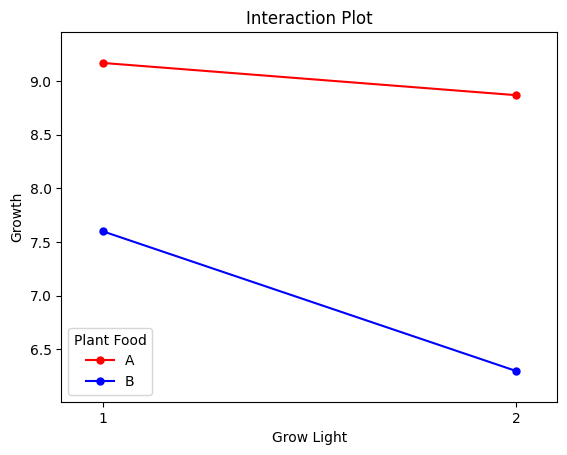

In [52]:
# Create a DataFrame
data_12_3_10 = {
    'Plant Food': ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B'],
    'Grow Light': ['1', '1', '1', '2', '2', '2', '1', '1', '1', '2', '2', '2'],
    'Growth': [9.2, 9.4, 8.9, 8.5, 9.2, 8.9, 7.1, 7.2, 8.5, 5.5, 5.8, 7.6]
}
df_12_3_10 = pd.DataFrame(data_12_3_10)

# Create interaction term
df_12_3_10['Treatment'] = df_12_3_10['Plant Food'] + '_' + df_12_3_10['Grow Light']

# Fit the two-way ANOVA model
model_12_3_10 = ols('Growth ~ C(Treatment)', data=df_12_3_10).fit()

# Perform ANOVA
anova_table_12_3_10 = anova_lm(model_12_3_10, typ=2)
print(anova_table_12_3_10)

# Conduct separate one-way ANOVAs for each factor
f_statistic_plant_food_12_3_10, p_value_plant_food_12_3_10 = stats.f_oneway(df_12_3_10[df_12_3_10['Grow Light'] == '1']['Growth'], df_12_3_10[df_12_3_10['Grow Light'] == '2']['Growth'])
f_statistic_grow_light_12_3_10, p_value_grow_light_12_3_10 = stats.f_oneway(df_12_3_10[df_12_3_10['Plant Food'] == 'A']['Growth'], df_12_3_10[df_12_3_10['Plant Food'] == 'B']['Growth'])

# Check for significant interaction
if anova_table_12_3_10['PR(>F)'][0] < 0.05:
    
    # Create a new DataFrame with interaction terms
    df_interaction = df_12_3_10.copy()
    df_interaction['Interaction'] = df_12_3_10['Plant Food'] + '_' + df_12_3_10['Grow Light']


# Visualize the interaction
interaction_plot(df_12_3_10['Grow Light'], df_12_3_10['Plant Food'], df_12_3_10['Growth'],
                 colors=['red', 'blue'], ms=10)
plt.xlabel('Grow Light')
plt.ylabel('Growth')
plt.title('Interaction Plot')
plt.show()

# Export results to Excel
with pd.ExcelWriter("section_12_3_10.xlsx") as writer:
    # Write ANOVA results to the first sheet
    anova_table_12_3_10.to_excel(writer, sheet_name='ANOVA Results', index=True)


1. Download the file ‘baseball.csv’ from the course resources and import the file into R.
2. Perform EDA on the imported data set. Write a paragraph or two to describe the data set
using descriptive statistics and plots. Are there any trends or anything of interest to discuss?
3. Assuming the expected frequencies are equal, perform a Chi-Square Goodness-of-Fit test to
determine if there is a difference in the number of wins by decade. Be sure to include the
following:
    * State the hypotheses and identify the claim.
    * Find the critical value (alpha <= 0.05) (From table in the book).
    * Compute the test value.
    * Make the decision. Clearly state if the null hypothesis should or should not be rejected and why.
    * Does comparing the critical value with the test value provide the same result as comparing the p-value from R with the significance level?

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB
None

Descriptive Statistics:
              Year           RS

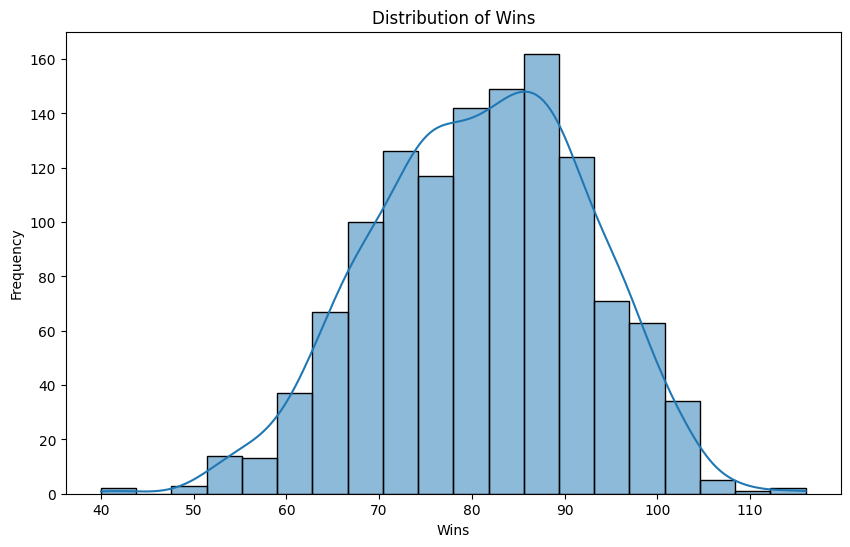

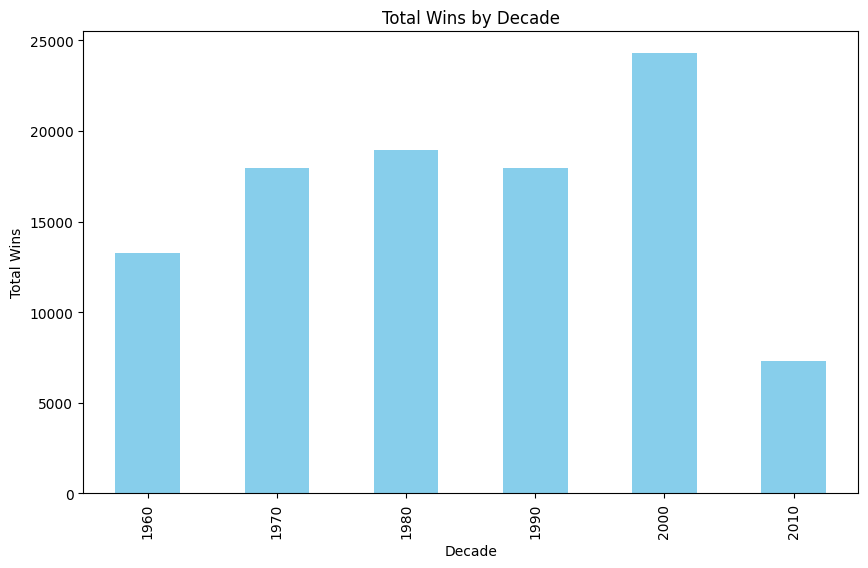

Chi-Square Test Results:
{'Chi-Square Statistic': 9989.536448823164, 'p-value': 0.0, 'Critical Value': 11.07, 'Alpha': 0.05, 'Reject Null Hypothesis': True}


In [26]:
# Load data
file_path = 'baseball.csv'
data = pd.read_csv(file_path)

# Perform EDA
# Display basic information
print("Basic Information about the dataset:")
print(data.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Plotting distributions and trends
plt.figure(figsize=(10, 6))
sns.histplot(data['W'], bins=20, kde=True)
plt.title("Distribution of Wins")
plt.xlabel("Wins")
plt.ylabel("Frequency")
plt.savefig('wins_distribution.png')
plt.show()

# Assume we have a 'Decade' column or create one by binning the years into decades if 'Year' is present.
# Example of creating a Decade column
data['Decade'] = (data['Year'] // 10) * 10
wins_by_decade = data.groupby('Decade')['W'].sum()

# Plotting wins by decade
plt.figure(figsize=(10, 6))
wins_by_decade.plot(kind='bar', color='skyblue')
plt.title("Total Wins by Decade")
plt.xlabel("Decade")
plt.ylabel("Total Wins")
plt.savefig('wins_by_decade.png')
plt.show()

# Chi-Square Goodness-of-Fit Test
# Hypotheses
# H0: The number of wins by decade is equally distributed (no significant difference).
# H1: The number of wins by decade is not equally distributed (significant difference).

# Expected frequency for each decade if they were equal
expected_frequency = [wins_by_decade.mean()] * len(wins_by_decade)

# Perform the Chi-Square test
chi2_stat, p_val = stats.chisquare(f_obs=wins_by_decade, f_exp=expected_frequency)

# Decision rule at alpha = 0.05
alpha = 0.05
critical_value = 11.070  # chi-square critical value for df = len(wins_by_decade) - 1 and alpha = 0.05

# Conclusion
result = {
    "Chi-Square Statistic": chi2_stat,
    "p-value": p_val,
    "Critical Value": critical_value,
    "Alpha": alpha,
    "Reject Null Hypothesis": chi2_stat > critical_value
}

# Print results
print("Chi-Square Test Results:")
print(result)

# Export results to an Excel file
excel_path = 'baseball_analysis.xlsx'
wb = Workbook()
ws = wb.active
ws.title = "Analysis Results"

# Write Chi-Square test results
ws.append(["Chi-Square Test Results"])
for key, value in result.items():
    ws.append([key, value])

# Insert images of plots
ws.append([])
ws.append(["Plots"])
ws.append(["Distribution of Wins"])
img1 = Image('wins_distribution.png')
ws.add_image(img1, 'A10')

ws.append(["Wins by Decade"])
img2 = Image('wins_by_decade.png')
ws.add_image(img2, 'A25')

wb.save(excel_path)

4. Download the file ‘crop_data.csv’ from the course resources and import the file into R.
5. Perform a Two-way ANOVA test using yield as the dependent variable and fertilizer and
density as the independent variables. Explain the results of the test. Is there reason to believe
that fertilizer and density have an impact on yield?

** Be sure to convert the variables density, fertilizer and block to R factors.

**Include a null and alternate hypothesis for both factors and the interaction.

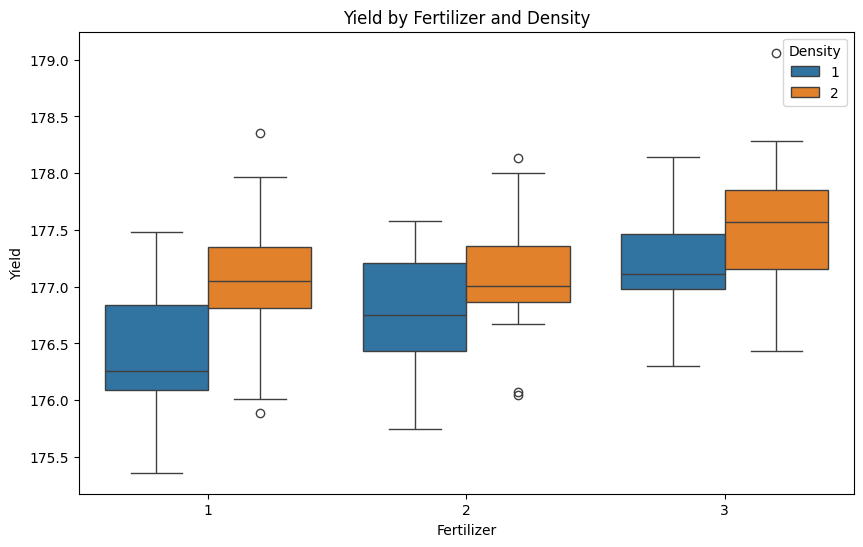

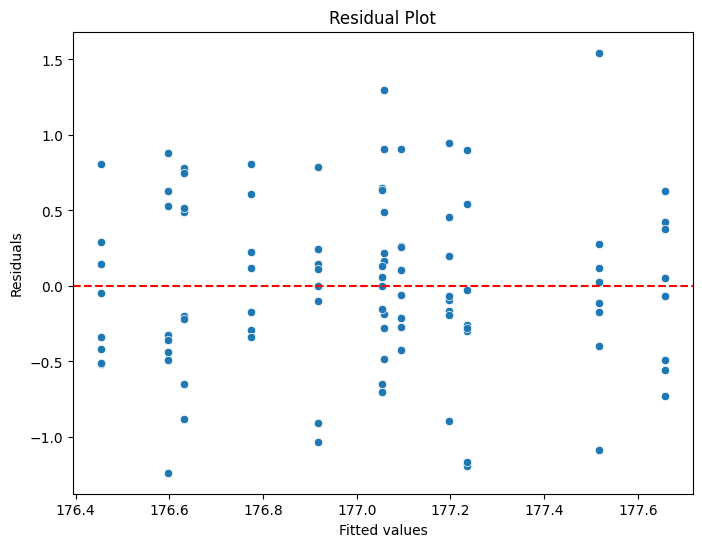

Results and plots exported to crop_data_analysis_results.xlsx
ANOVA Table:
                  sum_sq    df         F    PR(>F)
C(fertilizer)   6.068047   2.0  9.018390  0.000269
C(density)      2.434446   1.0  7.236195  0.008516
C(block)        5.607820   3.0  5.556264  0.001522
Residual       30.278366  90.0       NaN       NaN
Reject the null hypothesis for Fertilizer: Fertilizer has a significant effect on yield.
Reject the null hypothesis for Density: Density has a significant effect on yield.
Reject the null hypothesis for Interaction: There is a significant interaction effect between fertilizer and density on yield.


In [45]:
# Load the data
file_path = 'crop_data.csv'  # Adjust path if needed
data = pd.read_csv(file_path)

# Convert variables to categorical (factors)
data['fertilizer'] = data['fertilizer'].astype('category')
data['density'] = data['density'].astype('category')
data['block'] = data['block'].astype('category')

# Perform Two-Way ANOVA
# Hypotheses:
# For Fertilizer:
# H0: Fertilizer has no effect on yield.
# H1: Fertilizer has an effect on yield.

# For Density:
# H0: Density has no effect on yield.
# H1: Density has an effect on yield.

# Interaction of Fertilizer and Density:
# H0: There is no interaction effect between fertilizer and density on yield.
# H1: There is an interaction effect between fertilizer and density on yield.

# Define the formula for ANOVA
model = ols('yield_value ~ C(fertilizer) + C(density) + C(block)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Create Visualizations
# Yield by Fertilizer and Density
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='fertilizer', y='yield_value', hue='density')
plt.title("Yield by Fertilizer and Density")
plt.xlabel("Fertilizer")
plt.ylabel("Yield")
plt.legend(title="Density")
plt.savefig('yield_by_fertilizer_density.png')
plt.show()

# Residual plot to check ANOVA assumptions
residuals = model.resid
fitted = model.fittedvalues
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residual Plot")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.savefig('residual_plot.png')
plt.show()

# Export results and graphs to an Excel file
excel_path = 'crop_data_analysis_results.xlsx'
wb = Workbook()
ws = wb.active
ws.title = "ANOVA Results"

# Write ANOVA table to the Excel file
ws.append(["Two-Way ANOVA Results"])
for index, row in anova_table.iterrows():
    ws.append([index] + row.tolist())

# Insert images of plots
ws.append([])
ws.append(["Yield by Fertilizer and Density"])
img1 = Image('yield_by_fertilizer_density.png')
ws.add_image(img1, 'A10')

ws.append(["Residual Plot"])
img2 = Image('residual_plot.png')
ws.add_image(img2, 'A30')

wb.save(excel_path)
print(f"Results and plots exported to {excel_path}")

# Interpretation
print("ANOVA Table:")
print(anova_table)

# Interpretation
if anova_table.loc["C(fertilizer)", "PR(>F)"] < 0.05:
    print("Reject the null hypothesis for Fertilizer: Fertilizer has a significant effect on yield.")
else:
    print("Fail to reject the null hypothesis for Fertilizer: Fertilizer does not have a significant effect on yield.")

if anova_table.loc["C(density)", "PR(>F)"] < 0.05:
    print("Reject the null hypothesis for Density: Density has a significant effect on yield.")
else:
    print("Fail to reject the null hypothesis for Density: Density does not have a significant effect on yield.")

if anova_table.loc["C(block)", "PR(>F)"] < 0.05:
    print("Reject the null hypothesis for Interaction: There is a significant interaction effect between fertilizer and density on yield.")
else:
    print("Fail to reject the null hypothesis for Interaction: No significant interaction effect between fertilizer and density on yield.")